# 【問題1】ダーツのまとを選ぶ

In [4]:
import numpy as np

dice = list(range(1, 7))
for i in range(10):
    print(np.random.choice(dice))

3
3
4
6
2
6
3
2
5
6


# 【問題2】ダーツを投げて、刺さった場所を記録する

In [9]:
dice = list(range(1, 7))
key = np.random.choice(dice) # ダーツのまと
mu = [key, 0] # 平均
sigma = [[0.01,0], [0,0.01]] # 共分散行列
value = np.random.multivariate_normal(mu, sigma) # 2次元正規乱数を生成

print(value)

[ 3.94306186 -0.11227818]


# 【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する

In [43]:
dice = list(range(1, 7))
dict = {1:[],2:[],3:[],4:[],5:[],6:[]}
list_buf = []

for i in range(20):
    key = np.random.choice(dice) # ダーツのまと
    mu = [key, 0] # 平均
    sigma = [[0.01,0], [0,0.01]] # 共分散行列
    value = np.random.multivariate_normal(mu, sigma) # 2次元正規乱数を生成
    
    list_buf = dict[key] # ディクショナリのvalueを取得
    list_buf.append(value.tolist()) # ディクショナリのvalueに追加
    dict[key] = list_buf # ディクショナリのvalueを更新

print(dict)

{1: [[1.0416602787944134, 0.20363159521665908], [1.0765549210049674, -0.11522262276609266], [0.9235130251098864, 0.053717314356000925]], 2: [[2.121477946743841, -0.05095498674998357], [2.002612786677477, -0.18237978395591947], [1.79304282186185, 0.048364795504564]], 3: [[3.05157156475708, 0.016241111196606914], [2.9134955948193726, 0.019284538685843396], [3.0503633198736226, -0.05645516325028416], [3.2265270936046395, 0.008929973657313676], [2.926248612668055, 0.06777766427076769]], 4: [[4.020392959579074, -0.26981952298350337]], 5: [[4.875322087561986, -0.054028768263624107], [5.027853467471331, -0.14214033050945749], [5.159428733751424, -0.05280170774602238], [4.881011399633599, 0.10351122019183455], [5.0602593729134515, 0.03989494301419494]], 6: [[6.08705233175378, 0.014136710347595189], [6.038701477959696, 0.049451163676188965], [6.043803874046719, 0.20353846214106464]]}


# 【問題4】ダーツのまとと刺さった位置を描画する

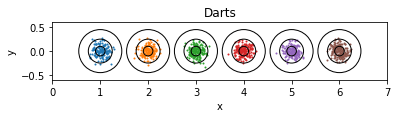

In [120]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

dice = list(range(1, 7))
dict = {1:[],2:[],3:[],4:[],5:[],6:[]}
list_buf = []

for i in range(1000):
    key = np.random.choice(dice) # ダーツのまと
    mu = [key, 0] # 平均
    sigma = [[0.01,0], [0,0.01]] # 共分散行列
    value = np.random.multivariate_normal(mu, sigma) # 2次元正規乱数を生成
    
    list_buf = dict[key] # ディクショナリのvalueを取得
    list_buf.append(value.tolist()) # ディクショナリのvalueに追加
    dict[key] = list_buf # ディクショナリのvalueを更新


# ダーツのまとと刺さった位置を描画    
fig, ax = plt.subplots()
    
for key in range(1,7):
    x = np.array(dict[key])[:,0]
    y = np.array(dict[key])[:,1]
    
    # ダーツのまとを描画
    c = patches.Circle(xy=(key, 0), radius=0.1, fill=False)
    ax.add_patch(c)
    c = patches.Circle(xy=(key, 0), radius=0.25, fill=False)
    ax.add_patch(c)    
    c = patches.Circle(xy=(key, 0), radius=0.45, fill=False)
    ax.add_patch(c)    
    
    # 散布図を描画（刺さった位置）
    ax.scatter(x, y, s=1)

plt.title("Darts")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 7)
plt.ylim(-0.6, 0.6)    
plt.gca().set_aspect('equal', adjustable='box')    
plt.show()  


# 【問題5】関数化

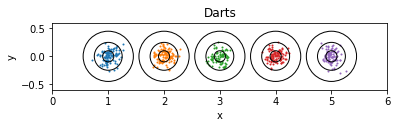

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

def Darts(n_target, n_play):
    dice = list(range(1, n_target + 1))
    list_buf = []
    dict = {}
    for i in range(n_target):
        dict[i + 1] = []
    
    for i in range(n_play):
        key = np.random.choice(dice) # ダーツのまと
        mu = [key, 0] # 平均
        sigma = [[0.01,0], [0,0.01]] # 共分散行列
        value = np.random.multivariate_normal(mu, sigma) # 2次元正規乱数を生成

        list_buf = dict[key] # ディクショナリのvalueを取得
        list_buf.append(value.tolist()) # ディクショナリのvalueに追加
        dict[key] = list_buf # ディクショナリのvalueを更新
        
    # ダーツのまとと刺さった位置を描画    
    fig, ax = plt.subplots()

    for key in range(1, n_target + 1):
        x = np.array(dict[key])[:,0]
        y = np.array(dict[key])[:,1]

        # ダーツのまとを描画
        c = patches.Circle(xy=(key, 0), radius=0.1, fill=False)
        ax.add_patch(c)
        c = patches.Circle(xy=(key, 0), radius=0.25, fill=False)
        ax.add_patch(c)    
        c = patches.Circle(xy=(key, 0), radius=0.45, fill=False)
        ax.add_patch(c)    

        # 散布図を描画（刺さった位置）
        ax.scatter(x, y, s=1)
    
    plt.title("Darts")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(0, n_target + 1)
    plt.ylim(-0.6, 0.6)    
    plt.gca().set_aspect('equal', adjustable='box')    
    plt.show()

    
# ダーツの投げる回数とダーツのまとの数を関数を呼び出し
n_target = 5 # ダーツのまとの数
n_play = 500 # ダーツの投げる回数
Darts(n_target, n_play)